In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/The School of AI/EVA Program/Week_7_Advanced_Conv

/content/drive/MyDrive/The School of AI/EVA Program/Week_7_Advanced_Conv


In [6]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
import torch.optim as optim
from torchsummary import summary
import numpy as np

### Loading the modular files

In [4]:
from files.train_test_transform import train_test_transform
from files.train_test_data_loader import train_test_data_loader
from files.model import Net
from files.trainer import Training

### Calculating mean and std for normalization

In [7]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

train_transforms, test_transforms = train_test_transform()

train_data_set = datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform= train_transforms)
test_data_set = datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform= test_transforms)

train_data = train_data_set.data
test_data = test_data_set.data

train_test_combine = np.concatenate((train_data, test_data),axis=0)
train_test_combine.reshape(-1,train_test_combine.shape[-1])
std=train_test_combine.reshape(-1,train_test_combine.shape[-1]).mean(0)/255
mean=train_test_combine.reshape(-1,train_test_combine.shape[-1]).std(0)/255

Files already downloaded and verified
Files already downloaded and verified


### Transforming the data and generating data loader

In [8]:
train_transforms, test_transforms = train_test_transform(normalize= True, mean= mean, std= std)
train_loader, test_loader = train_test_data_loader(train_transforms, test_transforms)

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


### Exploring the input data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 deer   car horse   dog


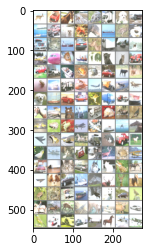

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

###  Training the model


In [10]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           9,216
              ReLU-6           [-1, 32, 32, 32]               0
       BatchNorm2d-7           [-1, 32, 32, 32]              64
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 64, 32, 32]          18,432
             ReLU-10           [-1, 64, 32, 32]               0
      BatchNorm2d-11           [-1, 64, 32, 32]             128
          Dropout-12           [-1, 64, 32, 32]               0
        MaxPool2d-13           [-1, 64, 16, 16]               0
           Conv2d-14          [-1, 128,

In [11]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.95)    
trainer1 = Training(model, optimizer, train_loader, test_loader, device)
train_metric, test_metric = trainer1.train(n_epoch=15)

Training the model for 15 epochs
EPOCH: 1




Test set: Average loss: 0.0079, Accuracy: 6538/10000 (65.38%)

EPOCH: 2




Test set: Average loss: 0.0058, Accuracy: 7411/10000 (74.11%)

EPOCH: 3




Test set: Average loss: 0.0052, Accuracy: 7687/10000 (76.87%)

EPOCH: 4




Test set: Average loss: 0.0048, Accuracy: 7884/10000 (78.84%)

EPOCH: 5




Test set: Average loss: 0.0046, Accuracy: 8004/10000 (80.04%)

EPOCH: 6




Test set: Average loss: 0.0046, Accuracy: 8074/10000 (80.74%)

EPOCH: 7




Test set: Average loss: 0.0044, Accuracy: 8136/10000 (81.36%)

EPOCH: 8




Test set: Average loss: 0.0044, Accuracy: 8161/10000 (81.61%)

EPOCH: 9




Test set: Average loss: 0.0044, Accuracy: 8236/10000 (82.36%)

EPOCH: 10




Test set: Average loss: 0.0046, Accuracy: 8214/10000 (82.14%)

EPOCH: 11




Test set: Average loss: 0.0045, Accuracy: 8210/10000 (82.10%)

EPOCH: 12




Test set: Average loss: 0.0046, Accuracy: 8257/10000 (82.57%)

EPOCH: 13




Test set: Average loss: 0.0047, Accuracy: 8248/10000 (82.48%)

EPOCH: 14




Test set: Average loss: 0.0049, Accuracy: 8273/10000 (82.73%)

EPOCH: 15




Test set: Average loss: 0.0048, Accuracy: 8254/10000 (82.54%)



### Result

Number of parameters: 349,856
Highest test accuracy: 82.73%

Remarks: Training accuracy is much higher then test accuracy so there is a overfitting in the model. We can add more conv layers to reduce the overfitting or can use regulization methods.